In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the cleaned qualifying data
qualifying_data = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\cleaned_data\\f1db-races-qualifying-results-CLEANED.csv')

# load the fastest qualifying time data by Merlin
fastest_qual_time_gaps = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\Merlin preview\Fastest Qual time gaps.csv')

# load the difference between starting grid position and race result position
grid_pos_diff = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-difference.csv')

# only keep the results on or after 1985
grid_pos_diff = grid_pos_diff[grid_pos_diff['year'] > 1984]

# compute the absolute value of the grid position difference
grid_pos_diff['absoluteDifference'] = grid_pos_diff['positionDifference'].abs()

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_6820\2511813044.py:2: SyntaxWarning: invalid escape sequence '\l'
  qualifying_data = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\cleaned_data\\f1db-races-qualifying-results-CLEANED.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_6820\2511813044.py:5: SyntaxWarning: invalid escape sequence '\l'
  fastest_qual_time_gaps = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\Merlin preview\Fastest Qual time gaps.csv')
C:\Users\luker\AppData\Local\Temp\ipykernel_6820\2511813044.py:8: SyntaxWarning: invalid escape sequence '\l'
  grid_pos_diff = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\gridposition-result-d

In [4]:
grid_pos_diff.head()

,raceId,year,round,driverId,positionDifference,absoluteDifference
10110,405,1985,1,alain-prost,-5.0,5.0
10111,405,1985,1,michele-alboreto,1.0,1.0
10112,405,1985,1,elio-de-angelis,0.0,0.0
10113,405,1985,1,rene-arnoux,-3.0,3.0
10114,405,1985,1,patrick-tambay,-6.0,6.0


In [5]:
# compute the sum of the absolute differnce for each raceId in the column and divide by the number of drivers

grid_pos_diff_std = grid_pos_diff.groupby('raceId')['absoluteDifference'].mean().reset_index()
grid_pos_diff_std.head()

,raceId,absoluteDifference
0,405,6.000000
1,406,5.777778
2,407,5.500000
3,408,5.000000
4,409,5.529412


In [6]:
# Merge grid_pos_diff_std with fastest_qual_time_gaps on raceId
merged_data = pd.merge(fastest_qual_time_gaps, grid_pos_diff_std, on='raceId', how='left')

In [7]:
merged_data.head()

,raceId,Bgap_mean,Bgap_median,Bgap_std,Bgap_var,First_ten_gap,Bgap_average,absoluteDifference
0,405,651.120000,379.0,889.426211,7.910790e+05,2332.0,651.120000,6.000000
1,406,378.769231,299.5,453.022865,2.052297e+05,2611.0,378.769231,5.777778
2,407,369.038462,189.0,425.468383,1.810233e+05,1370.0,369.038462,5.500000
3,408,12330.269231,121.5,60728.158091,3.687909e+09,1081.0,12330.269231,5.000000
4,409,416.720000,249.0,670.256877,4.492443e+05,1773.0,416.720000,5.529412


C:\Users\luker\AppData\Local\Temp\ipykernel_6820\2957224941.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


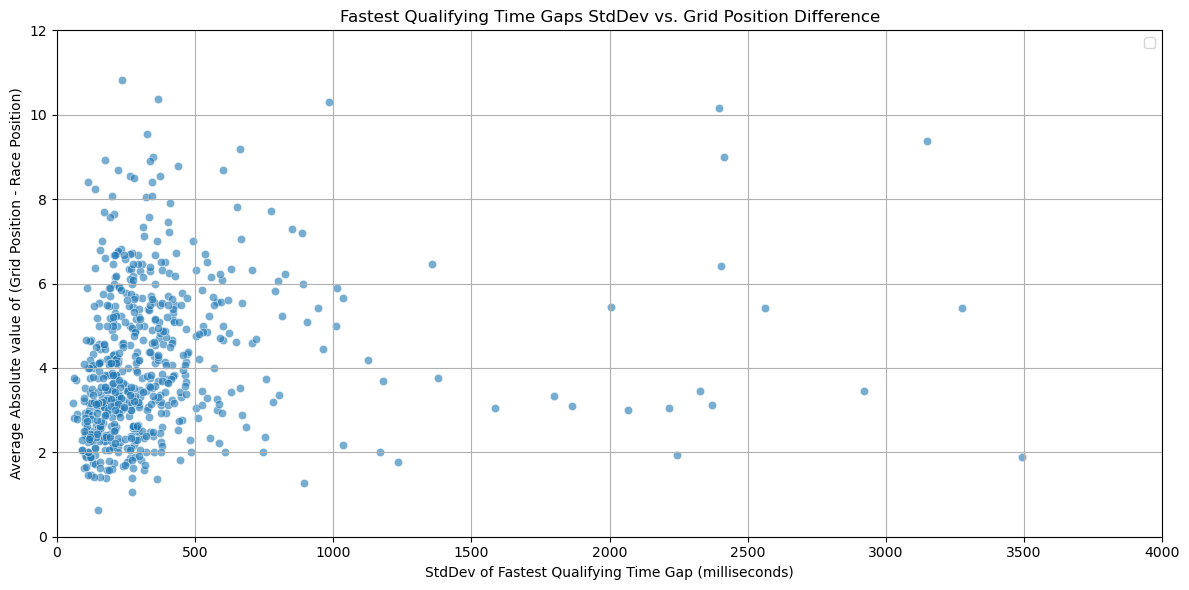

In [8]:
# Plot Bgap_std vs. absoluteDifference with x range from 0 to 10000 milliseconds

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Bgap_std', y='absoluteDifference', alpha=0.6) 
plt.title('Fastest Qualifying Time Gaps StdDev vs. Grid Position Difference')
plt.xlabel('StdDev of Fastest Qualifying Time Gap (milliseconds)')
plt.ylabel('Average Absolute value of (Grid Position - Race Position)')
plt.xlim(0, 4000)
plt.ylim(0, 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\Fastest Qualifying Time Gaps vs. Grid Position Difference.png')
plt.show()

C:\Users\luker\AppData\Local\Temp\ipykernel_6820\4264877816.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


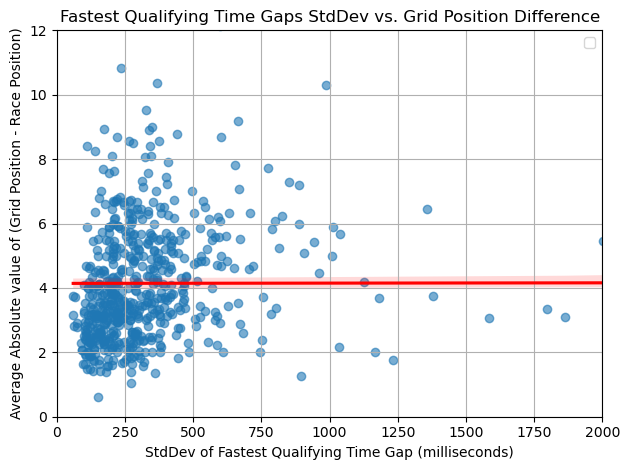

In [9]:
# Make a regression plot of Bgap_std vs. absoluteDifference
sns.regplot(data=merged_data, x='Bgap_std', y='absoluteDifference', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression of Fastest Qualifying Time Gaps StdDev vs. Grid Position Difference')
plt.title('Fastest Qualifying Time Gaps StdDev vs. Grid Position Difference')
plt.xlabel('StdDev of Fastest Qualifying Time Gap (milliseconds)')
plt.ylabel('Average Absolute value of (Grid Position - Race Position)')
plt.xlim(0, 2000)
plt.ylim(0, 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\Fastest Qualifying Time Gaps vs. Grid Position Difference.png')
plt.show()


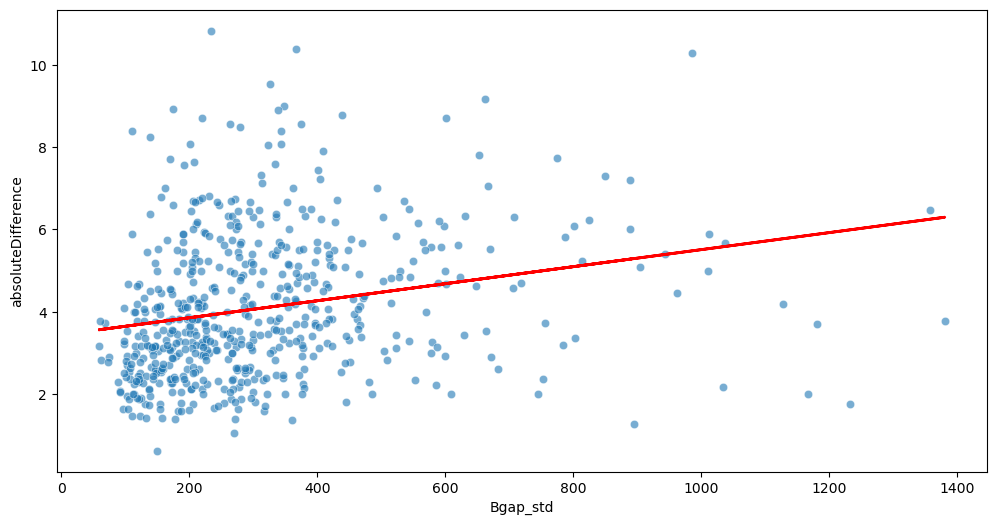

In [10]:
# load regression model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()
merged_data = merged_data.dropna(subset=['Bgap_std', 'absoluteDifference'])
merged_data = merged_data[merged_data['Bgap_std'] < 1500]  # Filter out extreme values for better regression fit
merged_data = merged_data[merged_data['absoluteDifference'] < 12]  # Filter out extreme values for better regression fit

# Prepare the data for regression
X = merged_data[['Bgap_std']]
y = merged_data['absoluteDifference']

# Fit the model
model.fit(X, y)

# Plot the regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Bgap_std', y='absoluteDifference', alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=2)


In [11]:
# export merged_data to a CSV file
merged_data.to_csv('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\merged_data.csv', index=False)

In [12]:
# Find the mean squared error of the regression model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, model.predict(X))
print(f'Mean Squared Error of the linear regression model: {mse:.2f}')


Mean Squared Error of the linear regression model: 2.86


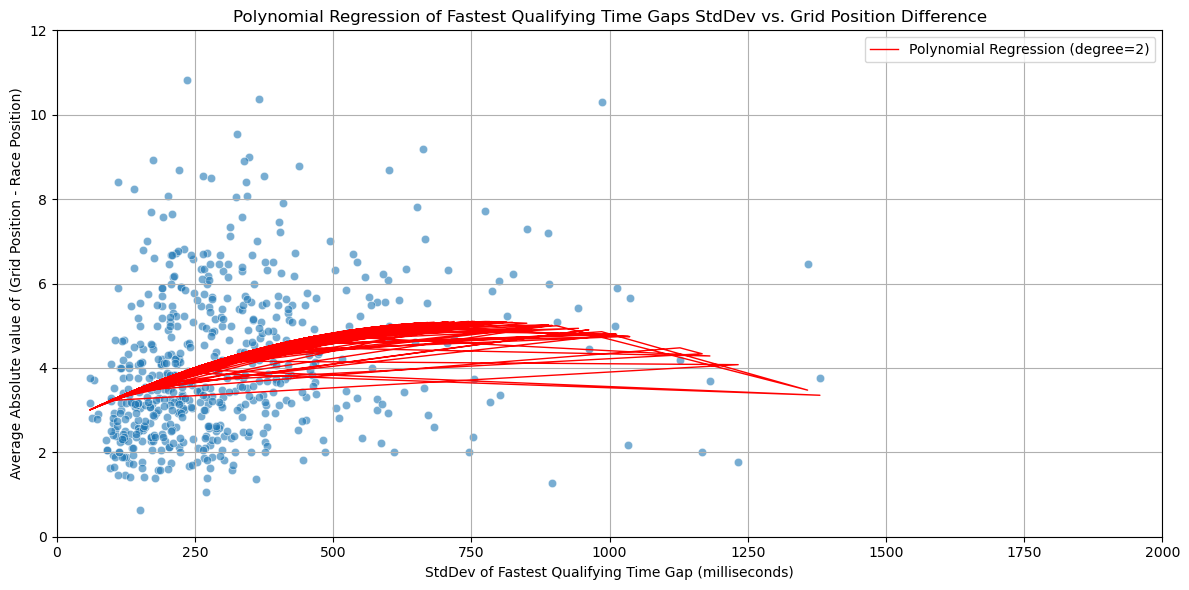

In [16]:
# Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Generate predictions for the polynomial regression
y_poly_pred = poly_model.predict(X_poly)

# Plot the polynomial regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Bgap_std', y='absoluteDifference', alpha=0.6)
plt.plot(X, y_poly_pred, color='red', linewidth=1, label='Polynomial Regression (degree=2)')
plt.title('Polynomial Regression of Fastest Qualifying Time Gaps StdDev vs. Grid Position Difference')
plt.xlabel('StdDev of Fastest Qualifying Time Gap (milliseconds)')
plt.ylabel('Average Absolute value of (Grid Position - Race Position)')
plt.xlim(0, 2000)
plt.ylim(0, 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\Polynomial Regression of Fastest Qualifying Time Gaps vs. Grid Position Difference.png')
plt.show()

Coefficients of the multiple linear regression model:
[0.00083029 0.00065598]
R-squared value of the multiple linear regression model: 0.16


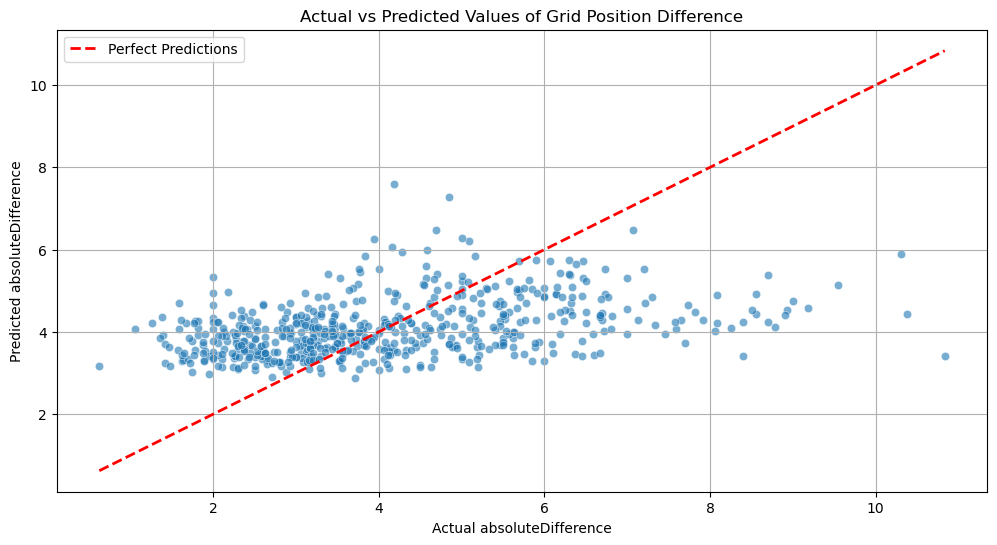

In [18]:
# Perform multiple linear regression with additional features

# Prepare the data for multiple regression
X_multi = merged_data[['Bgap_std', 'First_ten_gap']]

# Fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_multi, y)

# Generate predictions for the multiple linear regression
y_multi_pred = multi_model.predict(X_multi)

# Print the coefficients of the multiple linear regression model
print("Coefficients of the multiple linear regression model:")
print(multi_model.coef_)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_multi_pred, alpha=0.6)

# Add a line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.title('Actual vs Predicted Values of Grid Position Difference')
plt.xlabel('Actual absoluteDifference')
plt.ylabel('Predicted absoluteDifference')
plt.legend()
plt.grid(True)
plt.savefig('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\Actual vs Predicted Values of Grid Position Difference.png')

# Print the R-squared value of the multiple linear regression model
r_squared = multi_model.score(X_multi, y)
print(f'R-squared value of the multiple linear regression model: {r_squared:.2f}')

In [20]:
# load the cluster further squared mean
cluster_further_squared_mean = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\Patrick\Cluster Further Squared Mean.csv')

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\luker\AppData\Local\Temp\ipykernel_6820\4054803986.py:2: SyntaxWarning: invalid escape sequence '\l'
  cluster_further_squared_mean = pd.read_csv('C:\\Users\luker\OneDrive\Desktop\erdos_ds_f1\Patrick\Cluster Further Squared Mean.csv')


In [24]:
# Merge cluster_further_squared_mean with merged_data on raceId
merged_data = pd.merge(merged_data, cluster_further_squared_mean, on='raceId', how='left')

merged_data.dropna(subset=['further cluster squared mean'], inplace=True)

# Rename the column for clarity
merged_data.rename(columns={'further cluster squared mean': 'further_cluster_squared_mean'}, inplace=True)

merged_data.describe()



,raceId,Bgap_mean,Bgap_median,Bgap_std,Bgap_var,First_ten_gap,Bgap_average,absoluteDifference,further_cluster_squared_mean,further_cluster_squared_mean,further_cluster_squared_mean,further_cluster_squared_mean
count,573.000000,573.000000,573.000000,573.000000,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,758.394415,242.568386,138.967714,306.790351,1.324895e+05,1861.504363,242.568386,4.053747,0.269039,0.269039,0.269039,0.269039
std,208.677600,114.921798,66.586871,196.051677,2.154056e+05,929.832588,114.921798,1.741260,0.222853,0.222853,0.222853,0.222853
min,421.000000,62.700000,36.000000,59.299979,3.516488e+03,339.000000,62.700000,0.625000,0.000000,0.000000,0.000000,0.000000
25%,574.000000,169.318182,95.500000,178.112765,3.172416e+04,1171.000000,169.318182,2.764706,0.125000,0.125000,0.125000,0.125000
50%,760.000000,217.090909,124.500000,264.186511,6.979451e+04,1693.000000,217.090909,3.692308,0.200000,0.200000,0.200000,0.200000
75%,943.000000,291.807692,165.500000,371.624991,1.381051e+05,2311.000000,291.807692,5.133333,0.333333,0.333333,0.333333,0.333333
max,1125.000000,849.900000,520.500000,1380.528725,1.905860e+06,6447.000000,849.900000,10.833333,2.000000,2.000000,2.000000,2.000000


In [26]:
# Perform multiple linear regression with further_cluster_squared_mean and First_ten_gap
X_further = merged_data[['First_ten_gap', 'further_cluster_squared_mean']]
y = merged_data['absoluteDifference']

# Fit the multiple linear regression model
multi_model_further = LinearRegression()
multi_model_further.fit(X_further, y)

# Generate predictions for the multiple linear regression with further cluster squared mean
y_multi_pred_further = multi_model_further.predict(X_further)

# Print the coefficients of the multiple linear regression model with further cluster squared mean
print("Coefficients of the multiple linear regression model with further cluster squared mean:")
print(multi_model_further.coef_)

# Print the R-squared value of the multiple linear regression model with further cluster squared mean
r_squared_further = multi_model_further.score(X_further, y)
print(f'R-squared value of the multiple linear regression model with further cluster squared mean: {r_squared_further:.2f}')

Coefficients of the multiple linear regression model with further cluster squared mean:
[4.89126697e-04 6.65442332e-01 6.65442332e-01 6.65442332e-01
 6.65442332e-01]
R-squared value of the multiple linear regression model with further cluster squared mean: 0.25


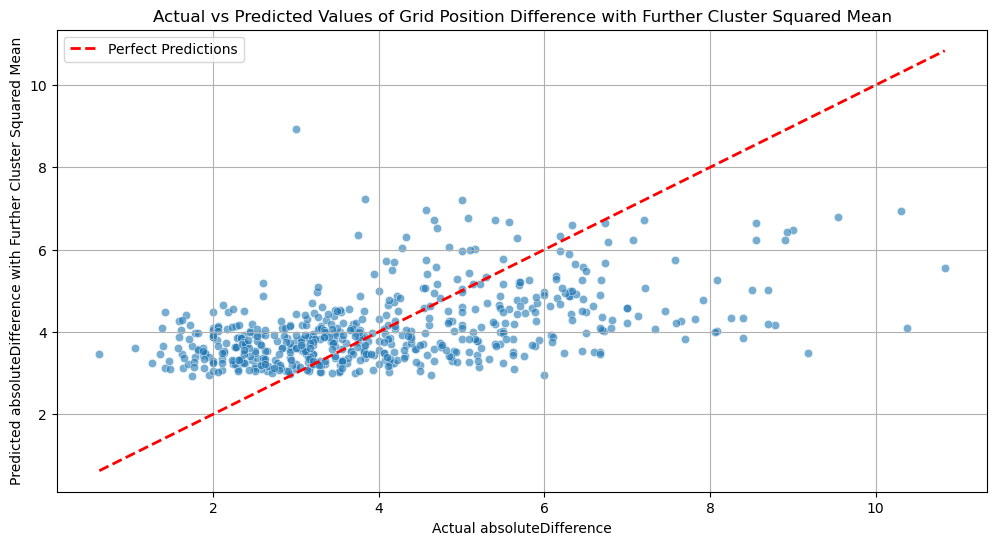

Mean Squared Error of the multiple linear regression model with further cluster squared mean: 2.27


In [27]:
# Make a scatter plot of actual vs predicted values for the model with further cluster squared mean
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_multi_pred_further, alpha=0.6)
# Add a line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.title('Actual vs Predicted Values of Grid Position Difference with Further Cluster Squared Mean')
plt.xlabel('Actual absoluteDifference')
plt.ylabel('Predicted absoluteDifference with Further Cluster Squared Mean')
plt.legend()
plt.grid(True)
plt.savefig('C:\\Users\\luker\\OneDrive\\Desktop\\erdos_ds_f1\\jaegeon\\Actual vs Predicted Values of Grid Position Difference with Further Cluster Squared Mean.png')
plt.show()

# Print the mean squared error of the multiple linear regression model with further cluster squared mean
mse_further = mean_squared_error(y, y_multi_pred_further)

print(f'Mean Squared Error of the multiple linear regression model with further cluster squared mean: {mse_further:.2f}')